<center>
    
# keras_mnist
    
<br>
</center>
<img src='../static/img/logo.jpg' align='right' style="width:260px;height:80 px"/>
<br>

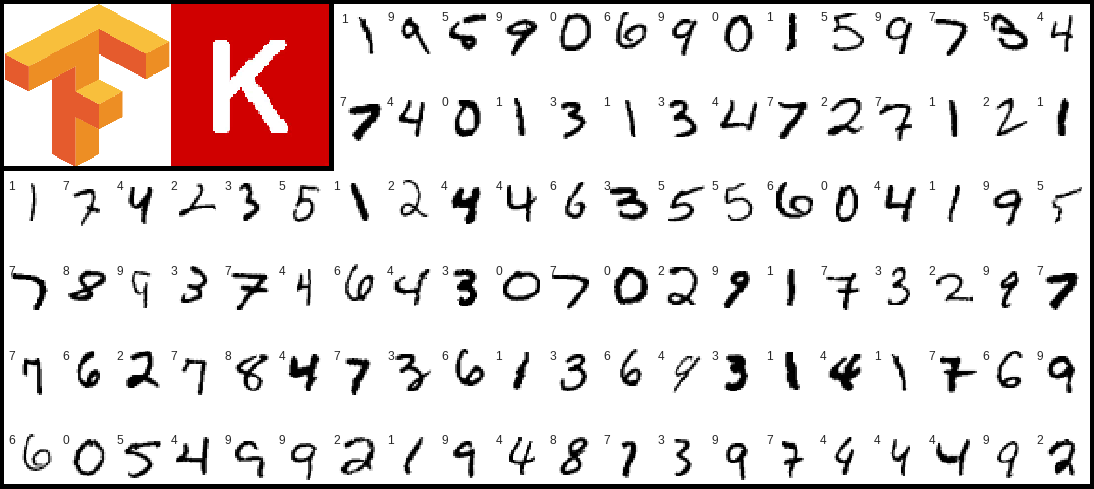




In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)
print(test_labels.shape)

Using TensorFlow backend.


(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [2]:
# 提取部分数据进行训练和测试
# 训练数据
train_images_part = train_images[:50000].reshape((50000, 28*28))
train_images_part = train_images_part.astype('float32') / 255
train_labels_part = train_labels[:50000]
print(train_images_part.shape)
# 验证数据
val_x = train_images[-10000:].reshape((10000, 28*28))
val_x = val_x.astype('float32') / 255
val_y = train_labels[-10000:]
print(val_x.shape)
# 测试数据
test_images_part = test_images[:10000].reshape((10000, 28 * 28))
test_images_part = test_images_part.astype('float32') / 255
test_labels_part = test_labels[:10000]
print(test_labels_part.shape)

(50000, 784)
(10000, 784)
(10000,)


In [3]:
# 处理标签（对标签进行分类编码）
from keras.utils import to_categorical
train_labels_part = to_categorical(train_labels_part)
val_y = to_categorical(val_y)
print(val_y.shape)
test_labels_part = to_categorical(test_labels_part)
test_labels.shape

(10000, 10)


(10000,)

In [4]:
# 构建模型
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape=(28*28, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation= 'softmax'))

# model = models.Sequential()
# model.add(layers.Dropout(0.2, input_shape=(28*28,)))
# model.add(layers.Dense(512,activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
model.compile(optimizer=
              optimizers.Adam(lr=0.001, 
              beta_1=0.9, 
              beta_2=0.999, 
              epsilon=None, 
              decay=0.0, 
              amsgrad=False),
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 开始训练
batch_size = 128
epochs = 10
history = model.fit(train_images_part, train_labels_part, batch_size = batch_size, epochs=epochs, validation_data=(val_x, val_y))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 169us/step - loss: 0.4486 - acc: 0.8733 - val_loss: 0.1989 - val_acc: 0.9451
Epoch 2/10
50000/50000 [==============================] - 3s 55us/step - loss: 0.2109 - acc: 0.9381 - val_loss: 0.1452 - val_acc: 0.9589
Epoch 3/10
50000/50000 [==============================] - 3s 59us/step - loss: 0.1594 - acc: 0.9532 - val_loss: 0.1224 - val_acc: 0.9637
Epoch 4/10
50000/50000 [==============================] - 3s 51us/step - loss: 0.1284 - acc: 0.9619 - val_loss: 0.1007 - val_acc: 0.9702
Epoch 5/10
50000/50000 [==============================] - 2s 50us/step - loss: 0.1104 - acc: 0.9667 - val_loss: 0.0930 - val_acc: 0.9721
Epoch 6/10
50000/50000 [==============================] - 3s 51us/step - loss: 0.0949 - acc: 0.9716 - val_loss: 0.0866 - val_acc: 0.9742
Epoch 7/10
50000/50000 [==============================] - 2s 50us/step - loss: 

In [7]:
test_loss, test_acc = model.evaluate(test_images_part, test_labels_part)
print('test_loss:{}, test_acc:{}'.format(test_loss, test_acc))

10000/10000 [==============================] - 1s 64us/step
test_loss:0.07412055261386559, test_acc:0.978


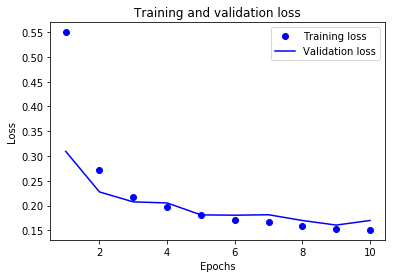

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 构建一个新的模型，该模型更深，观察浅层大模型和双层小模型的性能

In [9]:
# 构建新模型
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.001),input_shape=(28*28, )))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation= 'softmax'))

from keras import optimizers
model.compile(optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 开始训练
batch_size = 128
epochs = 10
history = model.fit(train_images_part, train_labels_part, batch_size = batch_size, epochs=epochs, validation_data=(val_x, val_y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 84us/step - loss: 0.5499 - acc: 0.9127 - val_loss: 0.3095 - val_acc: 0.9543
Epoch 2/10
50000/50000 [==============================] - 3s 68us/step - loss: 0.2708 - acc: 0.9562 - val_loss: 0.2274 - val_acc: 0.9648
Epoch 3/10
50000/50000 [==============================] - 3s 62us/step - loss: 0.2166 - acc: 0.9637 - val_loss: 0.2074 - val_acc: 0.9664
Epoch 4/10
50000/50000 [==============================] - 3s 65us/step - loss: 0.1962 - acc: 0.9673 - val_loss: 0.2052 - val_acc: 0.9662
Epoch 5/10
50000/50000 [==============================] - 3s 66us/step - loss: 0.1808 - acc: 0.9713 - val_loss: 0.1811 - val_acc: 0.9723
Epoch 6/10
50000/50000 [==============================] - 3s 69us/step - loss: 0.1709 - acc: 0.9728 - val_loss: 0.1805 - val_acc: 0.9717
Epoch 7/10
50000/50000 [==============================] - 4s 74us/step - loss: 0.1672 - acc: 0.9728 - val_loss: 0.1814 - val_acc

In [11]:
test_loss, test_acc = model.evaluate(test_images_part, test_labels_part)
print('test_loss:{}, test_acc:{}'.format(test_loss, test_acc))

10000/10000 [==============================] - 1s 77us/step
test_loss:0.17083472715616227, test_acc:0.9695


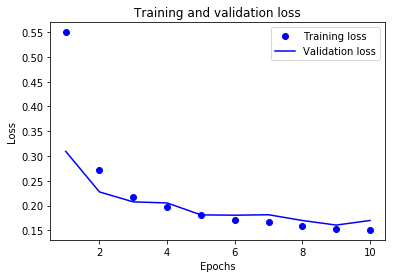

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()